In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## 我们利用Pandas自带的read_csv函数读取并转化为DataFrame格式

data = pd.read_csv('train.csv')

In [3]:
## 利用.info()查看数据的整体信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           106644 non-null  object 
 1   Location       106644 non-null  object 
 2   MinTemp        106183 non-null  float64
 3   MaxTemp        106413 non-null  float64
 4   Rainfall       105610 non-null  float64
 5   Evaporation    60974 non-null   float64
 6   Sunshine       55718 non-null   float64
 7   WindGustDir    99660 non-null   object 
 8   WindGustSpeed  99702 non-null   float64
 9   WindDir9am     99166 non-null   object 
 10  WindDir3pm     103788 non-null  object 
 11  WindSpeed9am   105643 non-null  float64
 12  WindSpeed3pm   104653 non-null  float64
 13  Humidity9am    105327 non-null  float64
 14  Humidity3pm    103932 non-null  float64
 15  Pressure9am    96107 non-null   float64
 16  Pressure3pm    96123 non-null   float64
 17  Cloud9am       66303 non-null

In [4]:
## 进行简单的数据查看，我们可以利用 .head() 头部.tail()尾部
data.head()


Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2012/1/19  MountGinini     12.1     23.1       0.0          NaN       NaN   
1  2015/4/13         Nhil     10.2     24.7       0.0          NaN       NaN   
2   2010/8/5    Nuriootpa     -0.4     11.0       3.6          0.4       1.6   
3  2013/3/18     Adelaide     13.2     22.6       0.0         15.4      11.0   
4  2011/2/16         Sale     14.1     28.6       0.0          6.6       6.7   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           30.0          N  ...        60.0         54.0   
1           E           39.0          E  ...        63.0         33.0   
2           W           28.0          N  ...        97.0         78.0   
3          SE           44.0          E  ...        47.0         34.0   
4           E           28.0         NE  ...        92.0         42.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0          NaN          NaN       NaN       NaN     17.0     22.0         No   
1       1021.9       1017.9       NaN       NaN     12.5     23.7         No   
2       1025.9       1025.3       7.0       8.0      3.9      9.0        Yes   
3       1025.0       1022.2       NaN       NaN     15.2     21.7         No   
4       1018.0       1014.1       4.0       7.0     19.1     28.2         No   

   RainTomorrow  
0            No  
1           Yes  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
data = data.fillna(-1)
data.tail()

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
106639   2011/5/23    Launceston     10.1     16.1      15.8         -1.0   
106640   2014/12/9     GoldCoast     19.3     31.7      36.0         -1.0   
106641   2014/10/7    Wollongong     17.5     22.2       1.2         -1.0   
106642   2012/1/16     Newcastle     17.6     27.0       3.0         -1.0   
106643  2014/10/21  AliceSprings     16.3     37.9       0.0         14.2   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
106639      -1.0          SE           31.0        NNW  ...        99.0   
106640      -1.0          SE           80.0        NNW  ...        75.0   
106641      -1.0         WNW           65.0        WNW  ...        61.0   
106642      -1.0          -1           -1.0         NE  ...        68.0   
106643      12.2         ESE           41.0        NNE  ...         8.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
106639         86.0        999.2        995.2      -1.0      -1.0     13.0   
106640         76.0       1013.8       1010.0      -1.0      -1.0     26.0   
106641         56.0       1008.2       1008.2      -1.0      -1.0     17.8   
106642         88.0         -1.0         -1.0       6.0       5.0     22.6   
106643          6.0       1017.9       1014.0       0.0       1.0     32.2   

        Temp3pm  RainToday  RainTomorrow  
106639     15.6        Yes           Yes  
106640     25.8        Yes           Yes  
106641     21.4        Yes            No  
106642     26.4        Yes            No  
106643     35.7         No            No  

[5 rows x 23 columns]

In [6]:
## 利用value_counts函数查看训练集标签的数量
pd.Series(data['RainTomorrow']).value_counts()

No     82786
Yes    23858
Name: RainTomorrow, dtype: int64

<ipython-input-10-4858bae42f75>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numerical_features = [x for x in data.columns if data[x].dtype == np.float]
<ipython-input-10-4858bae42f75>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  category_features = [x for x in data.columns if data[x].dtype != np.float and x != 'RainTomorrow']


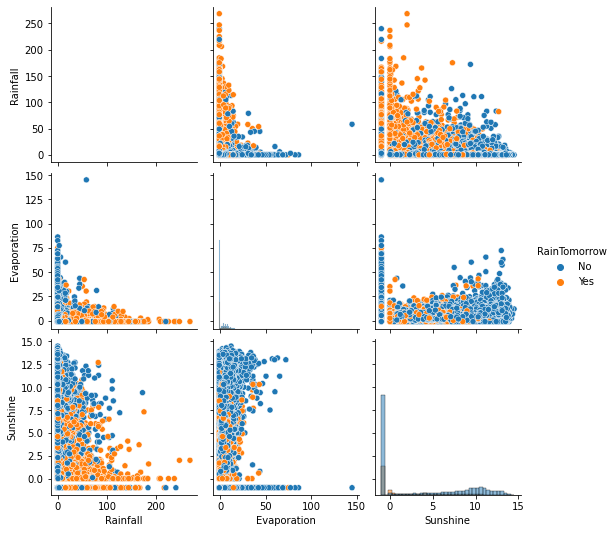

In [10]:
numerical_features = [x for x in data.columns if data[x].dtype == np.float]
category_features = [x for x in data.columns if data[x].dtype != np.float and x != 'RainTomorrow']
## 选取三个特征与标签组合的散点可视化
sns.pairplot(data=data[['Rainfall',
'Evaporation',
'Sunshine'] + ['RainTomorrow']], diag_kind='hist', hue= 'RainTomorrow')
#hue ：针对某一字段进行分类
#diag_kind：控制对角线上的图的类型，可选"hist"与"kde"
plt.show()

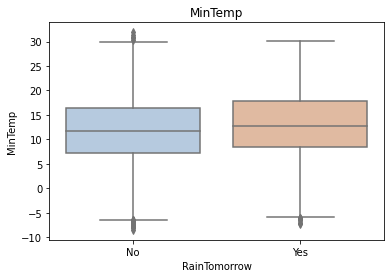

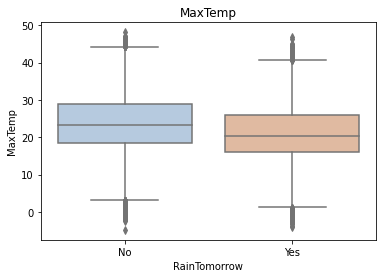

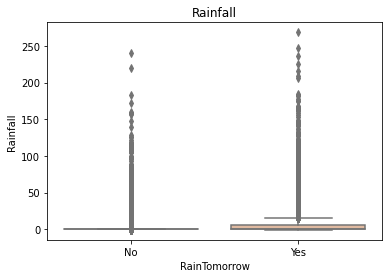

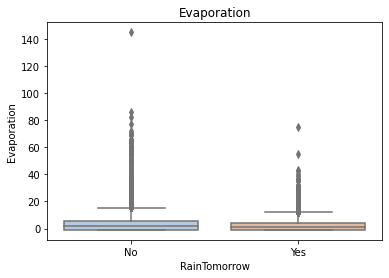

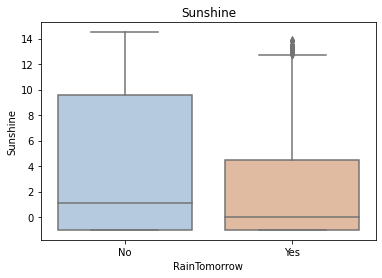

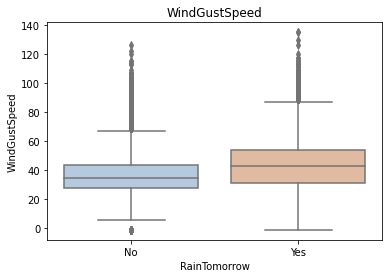

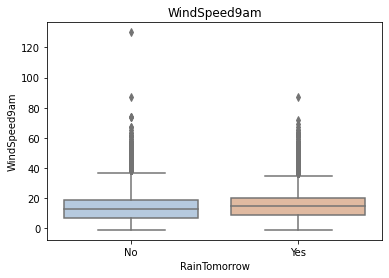

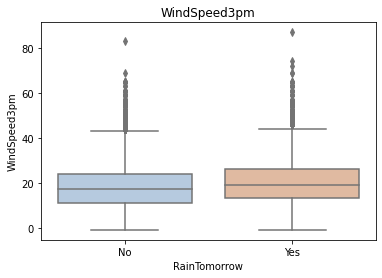

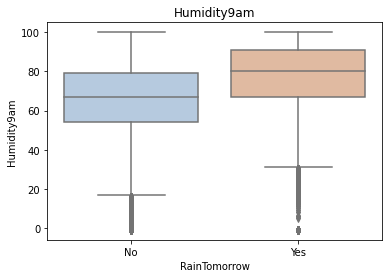

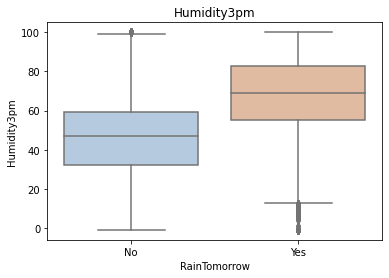

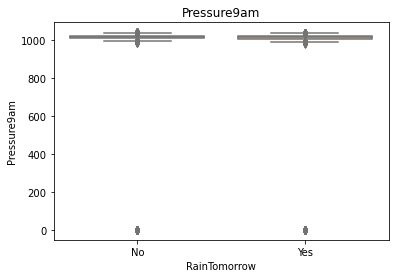

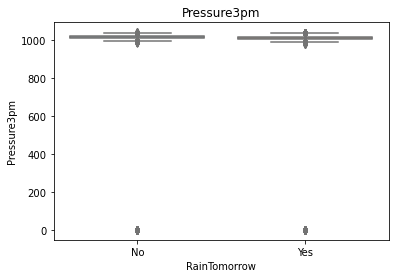

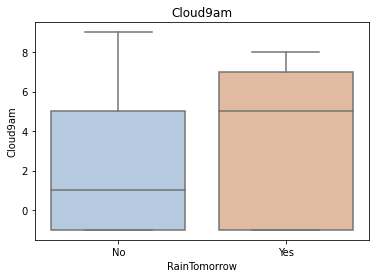

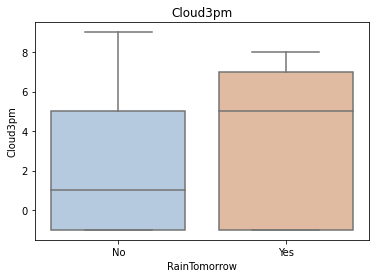

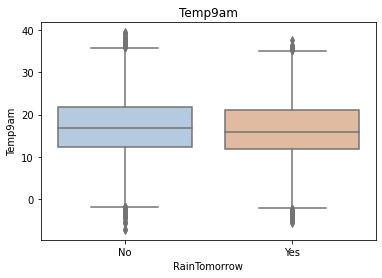

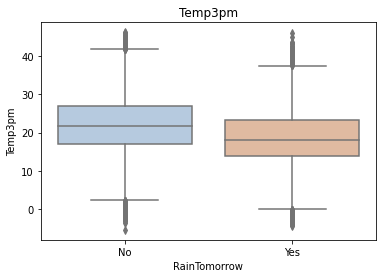

In [11]:
#从上图可以发现，在2D情况下不同的特征组合对于第二天下雨与不下雨的散点分布，以及大概的区分能力。相对的Sunshine与其他特征的组合更具有区分能力
for col in data[numerical_features].columns:
    if col != 'RainTomorrow':
        sns.boxplot(x='RainTomorrow', y=col, saturation=0.5, palette='pastel', data=data)
        plt.title(col)
        plt.show()
        #palette:调色板名称，list类别或者字典
        # 作用：用于对数据不同分类进行颜色区别
        # saturation 饱和度：float
#箱型图方框的末尾显示了上下四分位数。极线显示最高和最低值，不包括异常值

In [12]:
#利用箱型图我们也可以得到不同类别在不同特征上的分布差异情况。我们可以发现Sunshine,Humidity3pm,Cloud9am,Cloud3pm的区分能力较强
tlog = {}
for i in category_features:
    tlog[i] = data[data['RainTomorrow'] == 'Yes'][i].value_counts()
flog = {}
for i in category_features:
    flog[i] = data[data['RainTomorrow'] == 'No'][i].value_counts()

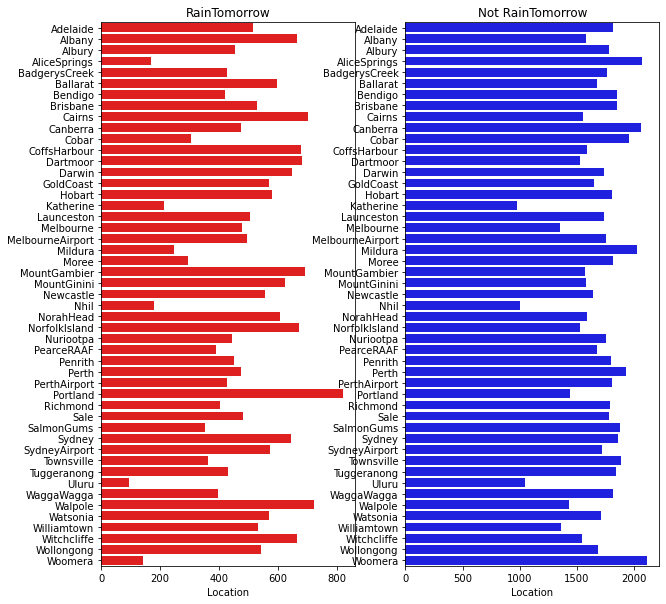

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('RainTomorrow')
sns.barplot(x = pd.DataFrame(tlog['Location']).sort_index()['Location'], y = pd.DataFrame(tlog['Location']).sort_index().index, color = "red")
plt.subplot(1,2,2)
plt.title('Not RainTomorrow')
sns.barplot(x = pd.DataFrame(flog['Location']).sort_index()['Location'], y = pd.DataFrame(flog['Location']).sort_index().index, color = "blue")
plt.show()

In [16]:
data[data['RainTomorrow']=='Yes']['Location']

1                Nhil
8             Bendigo
12        Witchcliffe
18             Darwin
20             Sydney
             ...     
106628       Brisbane
106631     PearceRAAF
106633        Penrith
106639     Launceston
106640      GoldCoast
Name: Location, Length: 23858, dtype: object

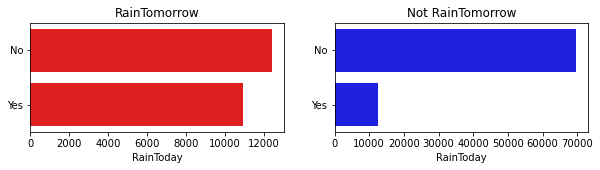

In [17]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.title('RainTomorrow')
sns.barplot(x = pd.DataFrame(tlog['RainToday'][:2]).sort_index()['RainToday'], y = pd.DataFrame(tlog['RainToday'][:2]).sort_index().index, color = "red")
plt.subplot(1,2,2)
plt.title('Not RainTomorrow')
sns.barplot(x = pd.DataFrame(flog['RainToday'][:2]).sort_index()['RainToday'], y = pd.DataFrame(flog['RainToday'][:2]).sort_index().index, color = "blue")
plt.show()

In [20]:
tlog['RainToday'][:2]

No     12422
Yes    10933
Name: RainToday, dtype: int64

In [21]:
## 把所有的相同类别的特征编码为同一个值
def get_mapfunction(x):
    mapp = dict(zip(x.unique().tolist(),
         range(len(x.unique().tolist()))))
    def mapfunction(y):
        if y in mapp:
            return mapp[y]
        else:
            return -1
    return mapfunction
for i in category_features:
    data[i] = data[i].apply(get_mapfunction(data[i]))

In [22]:
## 编码后的字符串特征变成了数字

data['Location'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

In [23]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = data['RainTomorrow']
data_features_part = data[[x for x in data.columns if x != 'RainTomorrow']]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)

In [28]:
!pip install xgboost
## 导入XGBoost模型
from xgboost import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

The accuracy of the Logistic Regression is: 0.8982476703979371
The accuracy of the Logistic Regression is: 0.8575179333302076
The confusion matrix result:
 [[15656  2142]
 [  897  2634]]


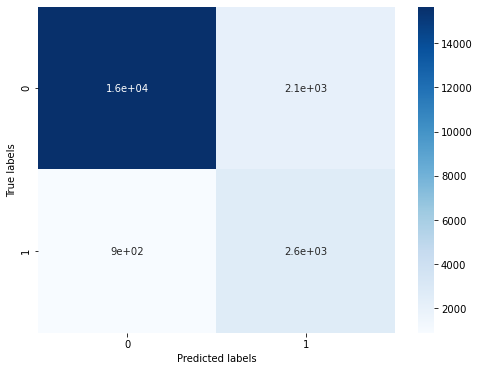

In [29]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<AxesSubplot:>

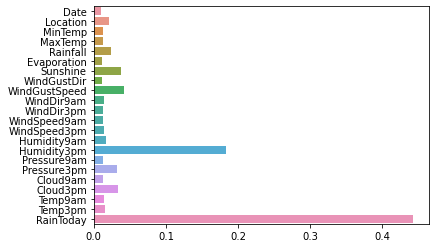

In [30]:
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


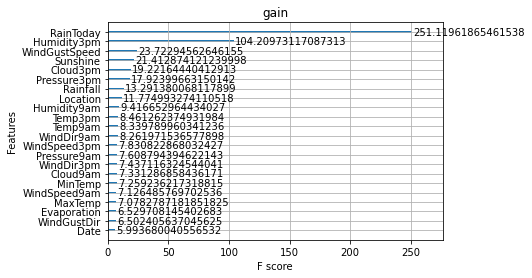

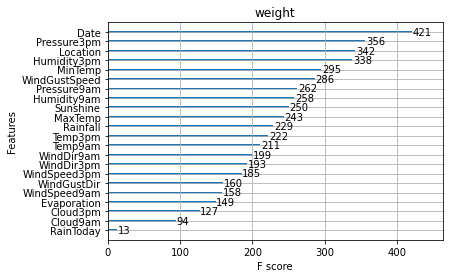

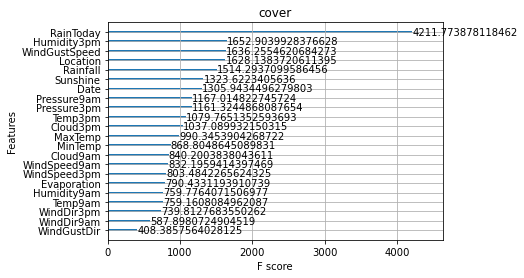

acc= 0.8575179333302076


In [31]:
#从图中我们可以发现下午3点的湿度与今天是否下雨是决定第二天是否下雨最重要的因素

# 初次之外，我们还可以使用XGBoost中的下列重要属性来评估特征的重要性。

# weight:是以特征用到的次数来评价
# gain:当利用特征做划分的时候的评价基尼指数
# cover:利用一个覆盖样本的指标二阶导数（具体原理不清楚有待探究）平均值来划分。
# total_gain:总基尼指数
# total_cover:总覆盖
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

def estimate(model,data):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="weight")
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type="cover")
    ax3.set_title('cover')
    plt.show()
def classes(data,label,test):
    model=XGBClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model, data)
    return ans
 
ans=classes(x_train,y_train,x_test)
pre=accuracy_score(y_test, ans)
print('acc=',accuracy_score(y_test,ans))


In [32]:
# XGBoost中包括但不限于下列对模型影响较大的参数：

# learning_rate: 有时也叫作eta，系统默认值为0.3。每一步迭代的步长，很重要。太大了运行准确率不高，太小了运行速度慢。
# subsample：系统默认为1。这个参数控制对于每棵树，随机采样的比例。减小这个参数的值，算法会更加保守，避免过拟合, 取值范围零到一。
# colsample_bytree：系统默认值为1。我们一般设置成0.8左右。用来控制每棵随机采样的列数的占比(每一列是一个特征)。
# max_depth： 系统默认值为6，我们常用3-10之间的数字。这个值为树的最大深度。这个值是用来控制过拟合的。max_depth越大，模型学习的更加具体。
# 调节模型参数的方法有贪心算法、网格调参、贝叶斯调参等。这里我们采用网格调参，它的基本思想是穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果

In [33]:
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
learning_rate = [0.1, 0.3, 0.6]
subsample = [0.8, 0.9]
colsample_bytree = [0.6, 0.8]
max_depth = [3,5,8]

parameters = { 'learning_rate': learning_rate,
              'subsample': subsample,
              'colsample_bytree':colsample_bytree,
              'max_depth': max_depth}
model = XGBClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
## 网格搜索后的最好参数为

clf.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 8,
 'subsample': 0.8}

[22:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the Logistic Regression is: 0.8992322569301998
The accuracy of the Logistic Regression is: 0.8567677809555065
The confusion matrix result:
 [[15723  2225]
 [  830  2551]]


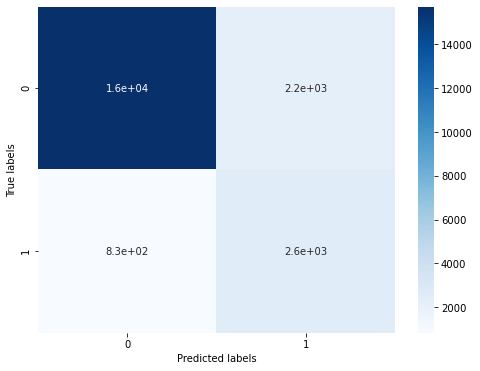

In [36]:
## 在训练集和测试集上分布利用最好的模型参数进行预测

## 定义带参数的 XGBoost模型 
clf = XGBClassifier(colsample_bytree = 0.6, learning_rate = 0.1, max_depth= 8, subsample = 0.8)
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()